RoBERTa base tests

Linear SVM

In [42]:
from sklearn import svm
clf = svm.LinearSVC(class_weight="balanced", dual=False)
clf.fit(train_x, train_y)
predict_stats(clf, test_x, test_y)

Micro F1-score: 0.861
Macro F1-score: 0.5197059563022414


SVM with RBF kernel

In [43]:
from sklearn import svm
clf = svm.SVC(class_weight="balanced")
clf.fit(train_x, train_y)
predict_stats(clf, test_x, test_y)

Micro F1-score: 0.8119999999999999
Macro F1-score: 0.5220462264637183


Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight="balanced")
clf.fit(train_x, train_y)
predict_stats(clf, test_x, test_y)

Micro F1-score: 0.867
Macro F1-score: 0.31562271508652207


SciKit Learn MLP

In [45]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(train_x, train_y)
predict_stats(clf, test_x, test_y)

Micro F1-score: 0.885
Macro F1-score: 0.47874377357404047


Custom MLP

In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(512, input_shape=(768,), activation="relu", kernel_initializer="he_normal"))
model.add(Dropout(0.25))
model.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
model.add(Dropout(0.35))
model.add(Dense(3, activation="softmax", kernel_initializer="he_normal"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [48]:
epochs = 3
count = len(train_y)
class_weights = np.sum(train_y_ohe, axis=0)
class_weights = { i : (count - w) / count for i,w in enumerate(class_weights)}

In [49]:
feature = model.fit(
    train_x_np,
    train_y_ohe,
    epochs=epochs,
    batch_size=32,
    class_weight=class_weights,
    verbose=2,
    validation_data=(test_x_np, test_y_ohe)
)

Epoch 1/3
314/314 - 2s - loss: 0.1314 - accuracy: 0.7724 - val_loss: 0.6490 - val_accuracy: 0.7130 - 2s/epoch - 6ms/step
Epoch 2/3
314/314 - 1s - loss: 0.1116 - accuracy: 0.8094 - val_loss: 0.3920 - val_accuracy: 0.8430 - 1s/epoch - 4ms/step
Epoch 3/3
314/314 - 1s - loss: 0.1047 - accuracy: 0.8087 - val_loss: 0.4293 - val_accuracy: 0.8390 - 1s/epoch - 4ms/step


In [50]:
results = pd.DataFrame({
    "training_accuracy": feature.history["accuracy"],
    "training_loss": feature.history["loss"],
    "test_accuracy": feature.history["val_accuracy"],
    "test_loss": feature.history["val_loss"],
    "epoch": list(range(1, epochs + 1))
})
results

,training_accuracy,training_loss,test_accuracy,test_loss,epoch
0,0.772433,0.131423,0.713,0.649030,1
1,0.809382,0.111551,0.843,0.392017,2
2,0.808684,0.104735,0.839,0.429255,3


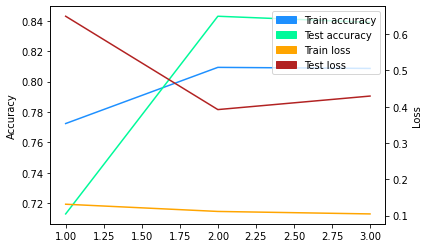

In [51]:
patches = [
    Patch(color='dodgerblue',label='Train accuracy'),
    Patch(color='mediumspringgreen',label='Test accuracy'),
    Patch(color='orange',label='Train loss'),
    Patch(color='firebrick',label='Test loss')
]

fig, ax1 = plt.subplots()

ax1.plot(results["epoch"],results["training_accuracy"],'dodgerblue')
ax1.plot(results["epoch"],results["test_accuracy"],'mediumspringgreen')
ax1.set_ylabel("Accuracy")

ax2 = ax1.twinx()
ax2.plot(results["epoch"],results["training_loss"],'orange')
ax2.plot(results["epoch"],results["test_loss"],'firebrick')
ax2.set_ylabel("Loss")

plt.legend(handles=patches)
plt.show()

In [52]:
predictions = np.argmax(model.predict(test_x_np), axis=1)
y_true = np.argmax(test_y_ohe, axis=1)
stats(y_true, predictions)

Micro F1-score: 0.839
Macro F1-score: 0.5310528640282088
